# 1-2. 샘플과 타깃의 인코딩

1. scikit-learn을 사용하여 원-핫 벡터 또는 이진 표현 만들기

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


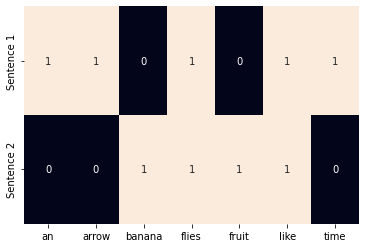

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies like an arrow.',
          'Fruit flies like a banana.']

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names()
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Sentence 1', 'Sentence 2'])

2. scikit-learn을 사용하여 TF-IDF 표현 만들기

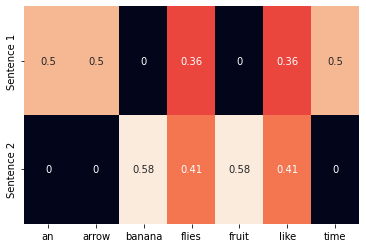

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Sentence 1', 'Sentence 2'])

# 1-4-2. 파이토치 텐서 만들기

In [ ]:
# 헬퍼 함수 정의
def  describe(x):
    print("타입: {}".format(x.type()))
    print("크기: {}".format(x.shape))
    print("값: \n{}".format(x))

import torch

# torch.Tensor로 텐서 만들기
describe(torch.Tensor(2, 3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[3.9611e+26, 3.0945e-41, 3.7835e-44],
        [0.0000e+00,        nan, 1.4714e-43]])


In [ ]:
# 랜덤으로 초기화한 텐서 만들기
describe(torch.rand(2, 3)) # 균등 분포: [0, 1)
describe(torch.randn(2, 3)) # 표준 정규 분포: 평균이 0이고 분산이 1인 정규 분포

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.0301, 0.8054, 0.4644],
        [0.7039, 0.9060, 0.9500]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-0.0394,  0.4951, -1.4679],
        [-0.6522, -0.1134, -0.7971]])


In [ ]:
# 동일한 스칼라값으로 채운 텐서 만들기
describe(torch.zeros(2, 3)) # 0으로 채우는 내장함수
x = torch.ones(2, 3) # 1로 채우는 내장함수
describe(x)
x.fill_(5) # fill_() 메소드를 이용하기
describe(x)

# fill_() 메소드와 같이 _로 끝나는 메소드를 인-플레이스 메소드라고 한다.
# 인-플레이스 메소드는 새로운 텐서를 만들지 않고, 현재값을 변경할 수 있다.

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [ ]:
# 파이썬 리스트로 텐서를 만들고 초기화하기
x = torch.Tensor([[1, 2, 3], 
                  [4, 5, 6]])
describe(x)

# 파이토치 텐서는 넘파이 배열과 상호 변환이 가능하다.
import numpy as np

npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy)) # 텐서 타입이 DoubleTensor임에 유의

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])
타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.9047, 0.5575, 0.6333],
        [0.7985, 0.0956, 0.3332]], dtype=torch.float64)


# 1-4-3. 텐서 타입과 크기

In [ ]:
# 텐서의 타입을 초기화(캐스팅)하기

# 특정 텐서 타입의 생성자 호출
x = torch.FloatTensor([[1, 2, 3], 
                       [4, 5, 6]])
describe(x)

# 타입 캐스팅
x = x.long()
describe(x)

# torch.tensor() 메소드와 dtype 매개변수 이용하기
x = torch.tensor([[1, 2, 3], 
                  [4, 5, 6]], dtype=torch.int64)
describe(x)

# 타입 캐스팅
x = x.float()
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


# 1-4-4. 텐서 연산

+, -, *, / 등의 연산자나 .add() 같은 함수를 이용할 수 있다.

In [ ]:
x = torch.randn(2, 3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 0.1831, -0.2174,  1.3454],
        [-0.8077,  0.0381, -0.3765]])


In [ ]:
describe(torch.add(x, x))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 0.3663, -0.4347,  2.6908],
        [-1.6154,  0.0762, -0.7530]])


In [ ]:
describe(x + x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[ 0.3663, -0.4347,  2.6908],
        [-1.6154,  0.0762, -0.7530]])


텐서의 특정 차원에 적용할 수 있는 연산도 있다.

In [ ]:
x = torch.arange(6) # stop 매개변수(default=0), step 매개변수(default=1)를 이용하여 stop부터 step씩 증가하는 텐서를 생성
describe(x)

x = x.view(2, 3) # view() 메소드는 동일한 데이터를 공유하는 새로운 텐서를 만든다.
describe(x)

타입: torch.LongTensor
크기: torch.Size([6])
값: 
tensor([0, 1, 2, 3, 4, 5])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


2D 텐서에서 행은 차원 0, 열은 차원 1로 표현할 수 있다.

In [ ]:
describe(torch.sum(x, dim=0)) # 열의 합을 행의 차원으로 표현

타입: torch.LongTensor
크기: torch.Size([3])
값: 
tensor([3, 5, 7])


In [ ]:
describe(torch.sum(x, dim=1)) # 행의 합을 열의 차원으로 표현

타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([ 3, 12])


In [ ]:
describe(torch.transpose(x, 0, 1)) # 두 번째와 세 번째 매개변수로 전달된 차원을 전치한 텐서를 생성

타입: torch.LongTensor
크기: torch.Size([3, 2])
값: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


# 1-4-5. 인덱싱, 슬라이싱, 연결

텐서 슬라이싱과 인덱싱

In [ ]:
x = torch.arange(6).view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
describe(x[:1, :2]) # 0행까지, 1열까지

타입: torch.LongTensor
크기: torch.Size([1, 2])
값: 
tensor([[0, 1]])


In [ ]:
describe(x[0, 1]) # 0행, 1열

타입: torch.LongTensor
크기: torch.Size([])
값: 
1


복잡한 인덱싱, 연속적이지 않은 텐서 인덱스 참조하기

In [ ]:
# 현재 텐서 x = [[0, 1, 2],
#                [3, 4, 5]]

indices = torch.LongTensor([0, 2])
describe(torch.index_select(x, dim=1, index=indices)) # == x[:, [0, 2]]
# 모든 행에 대해, 0열과 2열을 인덱싱

타입: torch.LongTensor
크기: torch.Size([2, 2])
값: 
tensor([[0, 2],
        [3, 5]])


In [ ]:
indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim=0, index=indices)) # == x[[0, 0], :]
# 모든 열에 대해, 0행과 0행을 인덱싱

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [0, 1, 2]])


In [ ]:
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])
describe(x[row_indices, col_indices]) # == x[[0, 1], [0, 1]]
# 0행과 1행에 대해, 각각 0열과 1열을 인덱싱

타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([0, 4])


텐서 연결

In [ ]:
x = torch.arange(6).view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
describe(torch.cat([x, x], dim=0))

타입: torch.LongTensor
크기: torch.Size([4, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [ ]:
describe(torch.cat([x, x], dim=1))

타입: torch.LongTensor
크기: torch.Size([2, 6])
값: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [ ]:
describe(torch.stack([x, x]))

타입: torch.LongTensor
크기: torch.Size([2, 2, 3])
값: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


텐서의 선형 대수 계산: 행렬 곱셈
그 외에도 역행렬(inverse, pinverse), 대각합(trace)등의 연산이 존재한다.

In [ ]:
x1 = torch.arange(6).view(2, 3).float()
describe(x1)

x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x2)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])
타입: torch.FloatTensor
크기: torch.Size([3, 2])
값: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [ ]:
describe(torch.mm(x1, x2)) 

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[ 3.,  6.],
        [12., 24.]])


# 1-4-6. 텐서와 계산 그래프

그래디언트 연산을 할 수 있는 텐서 만들기

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
# requires_grad를 True로 지정하면, 텐서의 모든 연산을 추적할 수 있다.
describe(x)
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [ ]:
y = (x + 2) * (x + 5) + 3
# 연산을 통해 생성된 텐서(일종의 예측값) y는 grad_fn이라는 속성을 갖게 된다.
describe(y)
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [ ]:
z = y.mean()
# 얘는 그냥 loss를 나타내기 위해 만든 스칼라 텐서
describe(z)
z.backward()
# backward() 메소드를 통해 requires_grad == True인 모든 텐서에 대해 loss에 대한 그래디언트를 갱신한다.
print(x.grad is None)
print(x.grad)
# (x+2)*(x+5)+3 의 미분계수 2x+7 에 대하여, x=1 일때의 값 9를 4로 나눈 2.25에 대한 2x2 텐서 형태를 지닌다..
# 미분계수가 2x+6 이 되게 한다면, grad는 2? 확인 O

타입: torch.FloatTensor
크기: torch.Size([])
값: 
21.0
False
tensor([[2.2500, 2.2500],
        [2.2500, 2.2500]])


# 1-4-7. CUDA 텐서

파이토치는 내부적인 할당 방식만 다를 뿐, CPU 텐서와 사용법이 같은 CUDA 텐서 객체를 제공한다. (NVIDIA GPU 에서만)

In [ ]:
import torch # 리소스를 GPU로 변경

print(torch.cuda.is_available())

True


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
print(device)

cuda


In [ ]:
x = torch.rand(3, 3).to(device)
describe(x)

타입: torch.cuda.FloatTensor
크기: torch.Size([3, 3])
값: 
tensor([[0.0764, 0.5565, 0.3761],
        [0.9616, 0.0544, 0.5871],
        [0.0537, 0.0782, 0.6545]], device='cuda:0')


CUDA 텐서와 CPU 텐서를 다루기 전에,
두 텐서가 같은 장치에 있는지 확인해야 한다!

In [ ]:
y = torch.rand(3, 3) # CPU 텐서
x + y

RuntimeError: ignored

In [ ]:
cpu_device = torch.device("cpu")
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[0.9744, 0.7734, 0.8376],
        [1.6546, 0.8957, 0.8365],
        [0.1480, 0.3700, 0.8452]])

GPU에 데이터를 넣고 빼는 작업은 비용이 많이 든다.
따라서, 병렬 계산만 GPU에서 수행하고, 최종 결과는 CPU로 전송하는 게 효율적.

# 1-5. 연습문제

In [1]:
import torch

def  describe(x):
    print("타입: {}".format(x.type()))
    print("크기: {}".format(x.shape))
    print("값: \n{}".format(x))

1. 2D 텐서를 만들고 차원 0 위치에 크기가 1인 차원을 추가하세요.

In [5]:
x = torch.rand(3, 3)
describe(x)
x = x.unsqueeze(0)
describe(x)

# unsqueeze(n) 메소드는 텐서의 n번째 차원 위치에 크기가 1인 차원을 추가한다.

타입: torch.FloatTensor
크기: torch.Size([3, 3])
값: 
tensor([[0.1187, 0.3007, 0.7054],
        [0.4525, 0.4172, 0.6739],
        [0.0842, 0.5697, 0.2279]])
타입: torch.FloatTensor
크기: torch.Size([1, 3, 3])
값: 
tensor([[[0.1187, 0.3007, 0.7054],
         [0.4525, 0.4172, 0.6739],
         [0.0842, 0.5697, 0.2279]]])


2. 이전 텐서에 추가한 차원을 삭제하세요.

In [6]:
x = x.squeeze()
describe(x)

# squeeze(n) 메소드는 텐서에서 n번째 차원 위치의 크기가 1인 차원을 제거한다.
# n을 따로 지정하지 않으면 크기가 1인 모든 차원을 제거한다

타입: torch.FloatTensor
크기: torch.Size([3, 3])
값: 
tensor([[0.1187, 0.3007, 0.7054],
        [0.4525, 0.4172, 0.6739],
        [0.0842, 0.5697, 0.2279]])


3. 범위가 [3, 7)이고 크기가 5x3인 랜덤한 텐서를 만드세요.

In [9]:
x = torch.randint(3, 7, (5, 3))
describe(x)

타입: torch.LongTensor
크기: torch.Size([5, 3])
값: 
tensor([[5, 4, 6],
        [5, 4, 5],
        [4, 3, 6],
        [4, 3, 4],
        [5, 5, 5]])


4. 정규 분포를 사용해 텐서를 만드세요.

In [12]:
x = torch.randn(3, 3) # == torch.rand(3, 3).normal_()
describe(x)

타입: torch.FloatTensor
크기: torch.Size([3, 3])
값: 
tensor([[ 0.3278,  0.9083, -0.5049],
        [-0.6795, -1.4495,  1.3674],
        [ 0.2134,  0.1492,  0.1906]])


5. 텐서 torch.Tensor([1, 1, 1, 0, 1])에서 0이 아닌 원소의 인덱스를 추출하세요.

In [17]:
x = torch.Tensor([1, 1, 1, 0, 1])
describe(x)
idx = x.nonzero()
describe(idx)
# nonzero() 메소드는 0이 아닌 값의 인덱스를 각 행에 담은 2차원 텐서를 반환한다.

idx = x.nonzero(as_tuple = True)
print(idx)
# as_tuple = True로 지정하면 1차원 텐서(튜플)에 담는다.

n = x.count_nonzero()
describe(n)
# count_nonzero() 메소드는 0이 아닌 값의 개수를 계산한다.

타입: torch.FloatTensor
크기: torch.Size([5])
값: 
tensor([1., 1., 1., 0., 1.])
타입: torch.LongTensor
크기: torch.Size([4, 1])
값: 
tensor([[0],
        [1],
        [2],
        [4]])
(tensor([0, 1, 2, 4]),)
타입: torch.LongTensor
크기: torch.Size([])
값: 
4


6. 크기가 (3, 1)인 랜덤한 텐서를 만들고 네 벌을 복사해 쌓으세요.

In [20]:
x = torch.rand(3, 1)
describe(x)
x = x.expand(3, 4)
describe(x)

# expand() 메소드는 기존에 크기가 1이었던 차원을, 인자로 전달한 값 만큼 반복한다.
# 2차원(열)을 4번 반복한다.
# 만약 인자로 -1이 들어가면, 그 차원의 크기를 변경하지 않겠다는 의미.
# 위 예제에서 첫 번째 인자로 3이 아니면 에러가 발생 --> 크기가 1인 차원만 확장 가능

타입: torch.FloatTensor
크기: torch.Size([3, 1])
값: 
tensor([[0.8137],
        [0.6874],
        [0.1815]])
타입: torch.FloatTensor
크기: torch.Size([3, 4])
값: 
tensor([[0.8137, 0.8137, 0.8137, 0.8137],
        [0.6874, 0.6874, 0.6874, 0.6874],
        [0.1815, 0.1815, 0.1815, 0.1815]])


7. 3차원 행렬 두 개(a = torch.rand(3, 4, 5), b = torch.rand(3, 5, 4))의 배치 행렬 곱셈을 계산하세요.

In [23]:
a = torch.rand(3, 4, 5)
describe(a)
b = torch.rand(3, 5, 4)
describe(b)
c = torch.bmm(a, b)
describe(c)

# bmm() 함수는 첫 번째 차원을 batch 차원으로 인식하는 행렬 곱셉에서 사용한다.
# [B, n, m] * [B, m, p] = [B, n, p]

타입: torch.FloatTensor
크기: torch.Size([3, 4, 5])
값: 
tensor([[[0.5680, 0.0068, 0.9699, 0.4187, 0.5026],
         [0.1569, 0.8994, 0.9959, 0.6357, 0.8933],
         [0.7470, 0.6242, 0.4460, 0.4726, 0.8231],
         [0.8410, 0.1826, 0.9185, 0.3258, 0.0709]],

        [[0.2538, 0.0264, 0.3758, 0.2692, 0.2857],
         [0.8428, 0.7718, 0.9785, 0.3267, 0.3648],
         [0.2255, 0.6944, 0.3828, 0.3473, 0.4074],
         [0.6808, 0.4360, 0.7517, 0.7851, 0.9767]],

        [[0.3264, 0.5704, 0.3841, 0.2709, 0.6311],
         [0.1307, 0.1400, 0.8754, 0.4089, 0.8710],
         [0.2092, 0.9091, 0.2237, 0.1502, 0.1430],
         [0.8247, 0.2370, 0.1474, 0.4428, 0.0073]]])
타입: torch.FloatTensor
크기: torch.Size([3, 5, 4])
값: 
tensor([[[0.7965, 0.8546, 0.4299, 0.0960],
         [0.2023, 0.5246, 0.9738, 0.9182],
         [0.7136, 0.6817, 0.8072, 0.1214],
         [0.3934, 0.1504, 0.9617, 0.7378],
         [0.3881, 0.7058, 0.7081, 0.2323]],

        [[0.6268, 0.0813, 0.0225, 0.2298],
         [0.6246, 

8. 3차원 행렬(a = torch.rand(3, 4, 5))과 2차원 행렬(b = torch.rand(5, 4))의 배치 행렬 곱셈을 계산하세요.

In [26]:
a = torch.rand(3, 4, 5)
b = torch.rand(5, 4)
describe(b)

b = b.unsqueeze(0)
describe(b)
b = b.expand(3, 5, 4) # == b.expand(a.size(0), *b.size())
describe(b)

c = torch.bmm(a, b)
describe(c)

# 아니면 그냥 torch.matmul(a, b) 

타입: torch.FloatTensor
크기: torch.Size([5, 4])
값: 
tensor([[0.8404, 0.5959, 0.9314, 0.5701],
        [0.4151, 0.1468, 0.4562, 0.0574],
        [0.8991, 0.9089, 0.3271, 0.8753],
        [0.1032, 0.1022, 0.0629, 0.5755],
        [0.4511, 0.6352, 0.5903, 0.7202]])
타입: torch.FloatTensor
크기: torch.Size([1, 5, 4])
값: 
tensor([[[0.8404, 0.5959, 0.9314, 0.5701],
         [0.4151, 0.1468, 0.4562, 0.0574],
         [0.8991, 0.9089, 0.3271, 0.8753],
         [0.1032, 0.1022, 0.0629, 0.5755],
         [0.4511, 0.6352, 0.5903, 0.7202]]])
타입: torch.FloatTensor
크기: torch.Size([3, 5, 4])
값: 
tensor([[[0.8404, 0.5959, 0.9314, 0.5701],
         [0.4151, 0.1468, 0.4562, 0.0574],
         [0.8991, 0.9089, 0.3271, 0.8753],
         [0.1032, 0.1022, 0.0629, 0.5755],
         [0.4511, 0.6352, 0.5903, 0.7202]],

        [[0.8404, 0.5959, 0.9314, 0.5701],
         [0.4151, 0.1468, 0.4562, 0.0574],
         [0.8991, 0.9089, 0.3271, 0.8753],
         [0.1032, 0.1022, 0.0629, 0.5755],
         [0.4511, 0.6352, 0.59